In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# 計算其平均值，標準偏差，最小值和最大值

In [4]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Median = %.2f' % data[col].median())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())
        print('\t Mode = %.2f' % data[col].mode().iloc[0])

age:
	 Mean = 38.58
	 Median = 37.00
	 Standard deviation = 13.64
	 Minimum = 17.00
	 Maximum = 90.00
	 Mode = 36.00
fnlwgt:
	 Mean = 189778.37
	 Median = 178356.00
	 Standard deviation = 105549.98
	 Minimum = 12285.00
	 Maximum = 1484705.00
	 Mode = 123011.00
education-num:
	 Mean = 10.08
	 Median = 10.00
	 Standard deviation = 2.57
	 Minimum = 1.00
	 Maximum = 16.00
	 Mode = 9.00
capital-gain:
	 Mean = 1077.65
	 Median = 0.00
	 Standard deviation = 7385.29
	 Minimum = 0.00
	 Maximum = 99999.00
	 Mode = 0.00
capital-loss:
	 Mean = 87.30
	 Median = 0.00
	 Standard deviation = 402.96
	 Minimum = 0.00
	 Maximum = 4356.00
	 Mode = 0.00
hours-per-week:
	 Mean = 40.44
	 Median = 40.00
	 Standard deviation = 12.35
	 Minimum = 1.00
	 Maximum = 99.00
	 Mode = 40.00


計算共變異數

In [5]:
print('Covariance:')
data.cov()

Covariance:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,186.061400,-1.103507e+05,1.281849,7.824819e+03,317.560742,11.580130
fnlwgt,-110350.685300,1.114080e+10,-11729.527298,3.366625e+05,-436030.333167,-24460.426185
education-num,1.281849,-1.172953e+04,6.618890,2.330008e+03,82.856445,4.705338
capital-gain,7824.818537,3.366625e+05,2330.007877,5.454254e+07,-94085.760688,7150.032029
capital-loss,317.560742,-4.360303e+05,82.856445,-9.408576e+04,162376.937814,269.953755
hours-per-week,11.580130,-2.446043e+04,4.705338,7.150032e+03,269.953755,152.458995


In [57]:
print('Correlation:')
corr=data.corr()

Correlation:


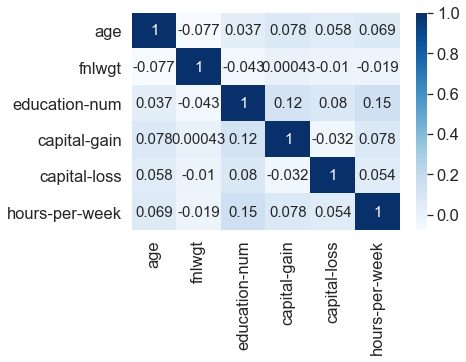

In [58]:
sns.set(font_scale=1.5)
sns.heatmap(corr, cmap='Blues', annot=True, annot_kws={"size": 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

藉由圖表更能清楚看見相關性

In [7]:
data['sex'].value_counts(normalize=True)

 Male      0.669205
 Female    0.330795
Name: sex, dtype: float64

看出在這比資料中兩種性別佔這數據的比重

In [8]:
grouped=data['age'].groupby([data['race'],data['sex']])
grouped.describe()

count       mean        std   min   25%   50%  \
race                sex                                                        
 Amer-Indian-Eskimo  Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                     Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
 Asian-Pac-Islander  Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                     Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
 Black               Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                     Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
 Other               Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                     Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
 White               Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                     Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                               75%   max  
race                sex                   
 Amer-Indian-Eskimo  Female  46.00  80.0  
                     Male    45.00  82.0  
 Asian-Pac-Islander  Female  43.75  75.0  
                     Male    46.00  90.0  
 Black               Female  46.00  90.0  
                     Male    46.00  90.0  
 Other               Female  39.00  74.0  
                     Male    42.00  77.0  
 White               Female  46.00  90.0  
                     Male    49.00  90.0

從年紀裡進行分群，發現不同人種與不同性別中，年紀的分布是否因為不同人種與性別有所差異，再藉由四分位數看不同比重下年紀大概為多少

In [9]:
df1=data['hours-per-week'].groupby(data['native-country']).agg(['mean','max','min'])
df1.sort_values(by='mean',ascending=True)

,mean,max,min
native-country,,,
Peru,35.387097,60,4
Hungary,35.615385,60,3
Nicaragua,36.176471,60,11
Honduras,36.307692,60,17
El-Salvador,36.792453,60,3
Haiti,36.909091,75,10
Vietnam,37.343284,77,1
Trinadad&Tobago,37.368421,60,14
China,37.786667,60,1


在不同國家平均工作時間分布，發現泰國是平均工作時間最長的，藉由分群能清楚看出每個國家的最長工時、最短工時跟平均工作時間

探討工資與其他數據是否有相關

In [10]:
data['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [11]:
data['age'].groupby(data['salary']).agg(['mean','min','max'])

,mean,min,max
salary,,,
<=50K,36.783738,17,90
>50K,44.249841,19,90


薪資有五萬的年紀平均下來發現比較年長

In [12]:
data['education'].groupby(data['salary']).value_counts()

salary  education    
 <=50K   HS-grad         8826
         Some-college    5904
         Bachelors       3134
         11th            1115
         Assoc-voc       1021
         10th             871
         Assoc-acdm       802
         Masters          764
         7th-8th          606
         9th              487
         12th             400
         5th-6th          317
         1st-4th          162
         Prof-school      153
         Doctorate        107
         Preschool         51
 >50K    Bachelors       2221
         HS-grad         1675
         Some-college    1387
         Masters          959
         Prof-school      423
         Assoc-voc        361
         Doctorate        306
         Assoc-acdm       265
         10th              62
         11th              60
         7th-8th           40
         12th              33
         9th               27
         5th-6th           16
         1st-4th            6
Name: education, dtype: int64

再經由畢業學歷高低判斷是否會影響到工作薪資

先挑選數字的欄位後，將這些欄位用直方圖畫出來

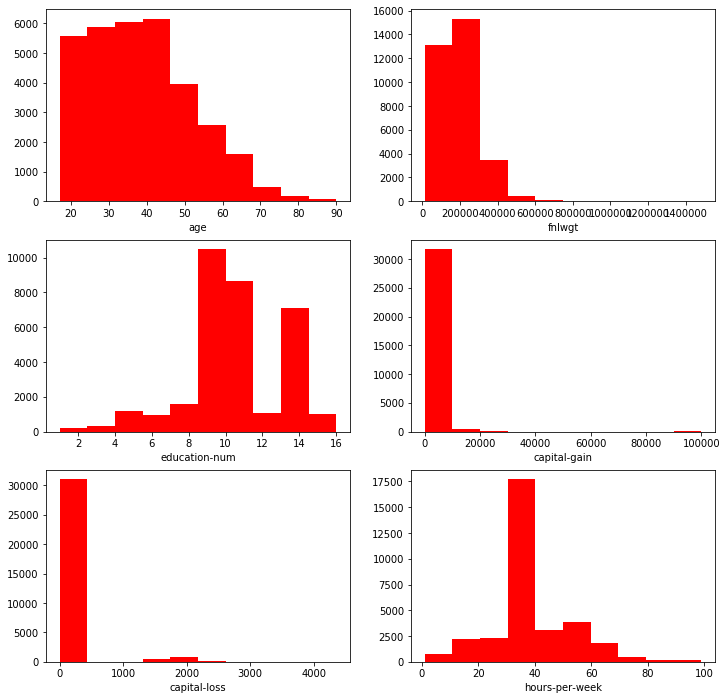

In [50]:
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for col in data.columns:
    if is_numeric_dtype(data[col]):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].hist(data[col] ,color='red')
        axes[ax1][ax2].set_xlabel(col)
        index = index + 1

繪製箱型圖

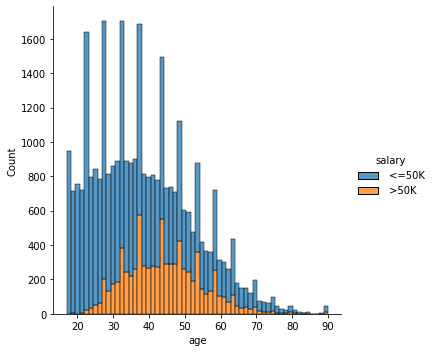

In [32]:
sns.displot(data, x="age", hue="salary",multiple="stack")

這長條圖在比較薪水高低在不同念記裡的分布，經由長條圖更能清楚看見

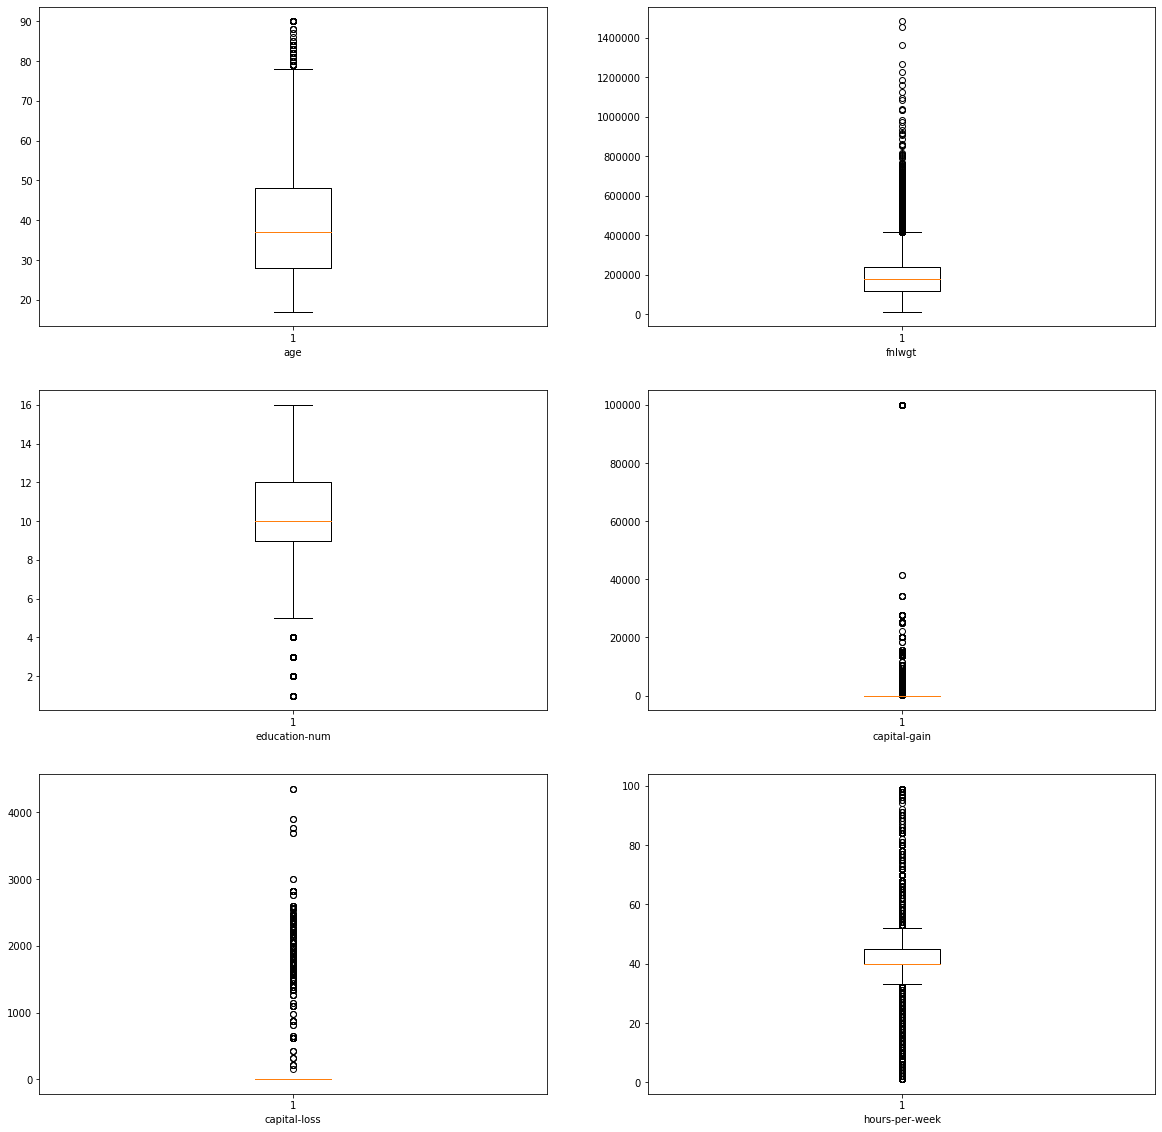

In [17]:
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
data.drop(columns=['workclass', 'education','marital-status','occupation','relationship','race','hours-per-week','native-country'])
fig, axes = plt.subplots(3,2, figsize=(20,20))
index = 0
for col in data.columns:
    if is_numeric_dtype(data[col]):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].boxplot(data[col])
        axes[ax1][ax2].set_xlabel(col)
        index = index + 1

In [18]:
data.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


箱型圖
顯示出一組數據的最大值、最小值、中位數、及上下四分位數，就由describe可以看出數值為多少